<a href="https://colab.research.google.com/github/athiradpz/Zomato-Restaurant-Clustering/blob/main/Zomato_Restaurant_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised ML - Zomato Restaurant Clustering

## **Business Context**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

## **Understanding the Dataset & the Business problem**

The dataset is divided into two parts, the first one namely "Zomato Restaurant reviews" contains reviews, ratings, and reviewer details and the other one, under the name "Zomato Restaurant names and Metadata" includes restaurant names, costs, cuisines, and other attributes.
Coming to the problem statement includes:

*  Analyzing customer reviews to identify sentiment trends
*   Cluster restaurants based on cuisine types for better business insights
*   Provide actionable insights for customers and stakeholders.


# **EDA Insights**

Performed EDA by taking below steps:

*   Used info() and isnull().sum() to understand the structure and identify missing values.
*   Visualized sentiment distribution using bar plots.
*   Generated word clouds to identify dominant cuisines.

Identified duplicates in both datasets and removed them.

Ensured integrity during merging by confirming the existence of matching restaurant names in both datasets.

# Dealing with Missing Values and Outliers
**Missing Values:**

Dropped rows with missing critical fields like Review, Rating, Name, and Cuisines.

Converted Cost from string to numeric and handled commas.

**Outliers:**

Checked for invalid ratings (e.g., ratings outside the expected range of 1–5) and handled them by coercion and cleaning.






# **Selecting the Approach and Algorithm**

**Sentiment Analysis:**

Chose TextBlob for simplicity and effectiveness in analyzing review sentiments.

Used polarity scores to classify sentiments as Positive, Neutral, or Negative.

Visualized sentiment distribution with bar plots.

**Clustering:**

Used TF-IDF Vectorization to extract features from cuisine descriptions.

Applied KMeans for clustering restaurants into 5 groups.Grouped restaurants based on cuisine types.

Reduced dimensions using PCA for visualization.

## **Brief Strategy for Clusters Formed**

Clusters are based on cuisine similarity, allowing stakeholders to:

Identify popular cuisine types.

Segment restaurants for targeted marketing.

Discover opportunities for introducing new cuisines based on gaps in clusters.

Saving Zomato Restaurant reviews.csv to Zomato Restaurant reviews (1).csv


Saving Zomato Restaurant names and Metadata.csv to Zomato Restaurant names and Metadata (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null

<ipython-input-12-c10a1d7bc265>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_cleaned['Rating']= pd.to_numeric(review_cleaned['Rating'],errors='coerce')


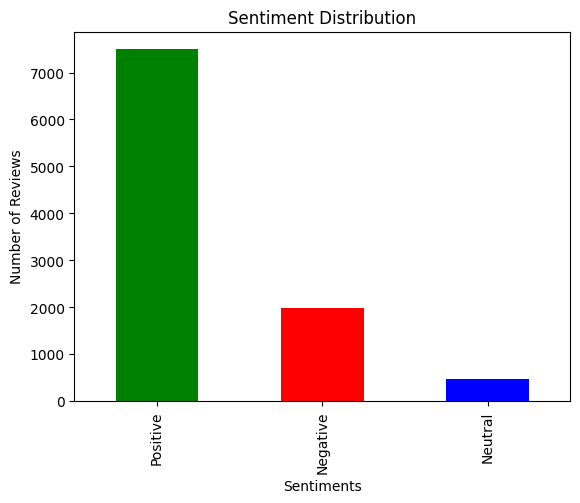

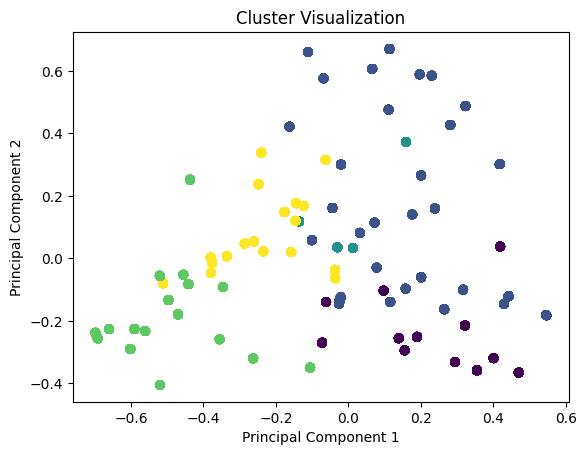

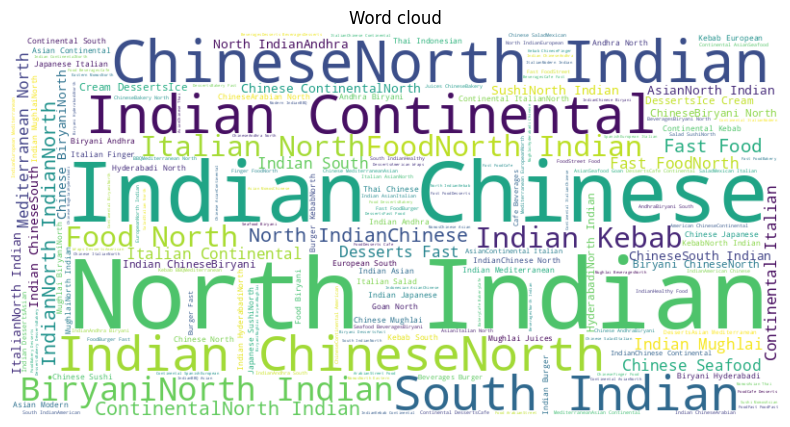

Cleaned Reviews Sample:
        Restaurant              Reviewer  ...             Time  Pictures
0  Beyond Flavours     Rusha Chakraborty  ...  5/25/2019 15:54         0
1  Beyond Flavours  Anusha Tirumalaneedi  ...  5/25/2019 14:20         0
2  Beyond Flavours       Ashok Shekhawat  ...  5/24/2019 22:54         0
3  Beyond Flavours        Swapnil Sarkar  ...  5/24/2019 22:11         0
4  Beyond Flavours                Dileep  ...  5/24/2019 21:37         0

[5 rows x 7 columns]
Merged Data with Clusters Sample:
              Name                                           Cuisines  Cluster
0  Beyond Flavours  Chinese, Continental, Kebab, European, South I...        1
1  Beyond Flavours  Chinese, Continental, Kebab, European, South I...        1
2  Beyond Flavours  Chinese, Continental, Kebab, European, South I...        1
3  Beyond Flavours  Chinese, Continental, Kebab, European, South I...        1
4  Beyond Flavours  Chinese, Continental, Kebab, European, South I...        1


In [ ]:

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from textblob import TextBlob

def clean_and_merge_data(reviews_path,metadata_path):
  reviews_df = pd.read_csv(reviews_path)
  metadata_df = pd.read_csv(metadata_path)

  #information on datastructure
  print(reviews_df.info())
  print(metadata_df.info())

  #check for missing values in each column
  print(reviews_df.isnull().sum())
  print(metadata_df.isnull().sum())

  #data cleaning for review_dataset
  review_cleaned=reviews_df.dropna(subset=['Reviewer','Review','Rating'])
  review_cleaned['Rating']= pd.to_numeric(review_cleaned['Rating'],errors='coerce')
  review_cleaned=review_cleaned.dropna(subset=['Rating'])
  review_cleaned=review_cleaned.drop_duplicates()
  review_cleaned.head()

  #data cleaning for metadata dataset
  metadata_cleaned=metadata_df['Cost'].str.replace(',','').astype(float)
  metadata_cleaned=metadata_df.dropna(subset=['Cost', 'Name', 'Cuisines'])
  metadata_cleaned=metadata_df.drop_duplicates()

  # Data Integration: Merge datasets on restaurant name
  merged_data= pd.merge(review_cleaned, metadata_cleaned, left_on='Restaurant', right_on='Name', how='inner')
  return review_cleaned,metadata_cleaned,merged_data


#sentiment analysis
def analyze_sentiments(reviews_df):
  #perform sentiment analysis on reviews
  reviews_df['sentiment']=reviews_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
  reviews_df['sentiment_category']=reviews_df['sentiment'].apply(lambda x: 'Positive' if x>0 else ('Negative' if x<0 else 'Neutral'))

  #sentiment distribution
  sentiment_counts=reviews_df['sentiment_category'].value_counts()
  sentiment_counts.plot(kind='bar', color=['green','red', 'blue'], title='Sentiment Distribution')
  plt.xlabel('Sentiments')
  plt.ylabel('Number of Reviews')
  plt.show()

  return reviews_df

#clustering function
def cluster_restaurant(merged_data):
  vectorizer=TfidfVectorizer(stop_words='english')
  tfidf_matrix=vectorizer.fit_transform(merged_data['Cuisines'])

  #kmeans clustering
  kmeans=KMeans(n_clusters=5, random_state=42)
  merged_data['Cluster']= kmeans.fit_predict(tfidf_matrix)

  #visualize clusters with PCA
  pca=PCA(n_components=2)
  reduced_data=pca.fit_transform(tfidf_matrix.toarray())
  plt.scatter(reduced_data[:,0], reduced_data[:,1], c=merged_data['Cluster'], cmap='viridis')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('Cluster Visualization')
  plt.show()

  return merged_data

#world cloud function
def generate_word_cloud(data, column):
  text="".join(data[column].dropna().astype(str))
  wordcloud=WordCloud(width=800, height=400, background_color= 'white').generate(text)

  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word cloud')
  plt.show()


review_upload=files.upload()
metadata_upload=files.upload()
reviews_path = 'Zomato Restaurant reviews.csv'
metadata_path = 'Zomato Restaurant names and Metadata.csv'

cleaned_reviews, cleaned_metadata, merged_data= clean_and_merge_data(reviews_path, metadata_path)
cleaned_sentiments= analyze_sentiments(merged_data)
clustered_data= cluster_restaurant(merged_data)
generate_word_cloud(merged_data,'Cuisines')

print("Cleaned Reviews Sample:")
print(cleaned_reviews.head())

print("Merged Data with Clusters Sample:")
print(merged_data[['Name', 'Cuisines', 'Cluster']].head())





# **Conclusion**

# Sentiment Insights:
Majority of reviews are positive, indicating overall customer satisfaction.
Identified areas of improvement from negative reviews.

# Restaurant Clusters:
Grouped restaurants based on cuisine, helping in targeted promotions.

Visualizations provided actionable insights into distinct cuisine trends.

# Insights for Customers:

Provides sentiment trends for restaurants, helping customers choose better options.
Shows popular cuisine clusters to explore new food options.

# Insights for  Restaurant Owners:
Highlights areas for improvement using sentiment analysis.

Suggests market gaps and potential cuisines for expansion.

# Insights for Zomato:
Enables personalized recommendations for customers.

Assists in strategic restaurant partnerships based on cluster insights.

## **In conclusion, this project successfully analyzed customer reviews, identified sentiment trends, and clustered restaurants based on cuisines, providing actionable insights that benefit customers, restaurant owners, and Zomato alike, while paving the way for data-driven decision-making in the Indian food industry.**